## TP 2 : Linear regression

In [329]:
# Import everything
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from numpy.random import normal as rnorm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [330]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [331]:
fn1 = "eugenie"
ln1 = "dulout"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

## Preprocess the data

#### Q1

Load the data. Print the mean, and standard deviation of every covariate. Is the data centered?
Normalized? Standardized?

In [332]:
df = pd.read_csv('data_dm3.csv', sep = ",", header = None)
np.random.seed(0)

In [333]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [334]:
#The last column is Y, we need to create a copy of the data set with only X
X = df.copy()
X = X.iloc[: , :-1]
Y = df[210]

In [335]:
X.describe()[1:4]

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
mean,2.411344e-17,-2.310871e-17,1.210382e-17,-1.054963e-17,1.632681e-17,-2.310871e-17,2.474140e-17,2.662526e-17,2.511817e-18,-1.004727e-17,...,2.034572e-17,-7.786632e-18,-3.591898e-17,7.535450e-18,-2.122485e-17,1.004727e-18,1.858744e-17,-2.511817e-19,-1.306145e-17,8.037814e-18
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.436711e+00,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00


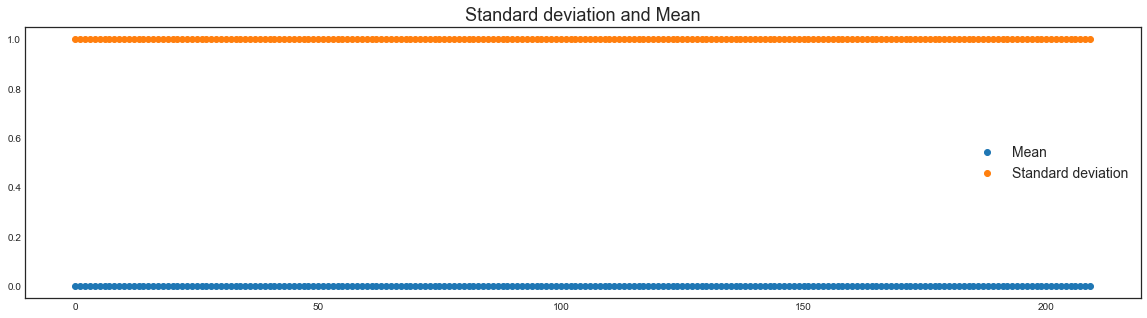

In [336]:
#We verify by plotting the mean and std

fig = plt.figure(figsize=(20, 5))
plt.scatter(X.columns, X.describe()[1:2], label="Mean")
plt.scatter(X.columns, X.describe()[2:3], label="Standard deviation")
plt.title('Standard deviation and Mean')
plt.legend()
plt.show()

The mean is inferior to E-2 for each covariate, the data is centered.
The difference between the standard variation and 1 is smaller than E-2 for each covariate, the data is standardized.
The maximum is different from 1 and the minimum from 0, the data isn't normalized.

In [337]:
#Transform the sets into numpy arrays

X = X.to_numpy().copy()
Y = Y.to_numpy().copy()

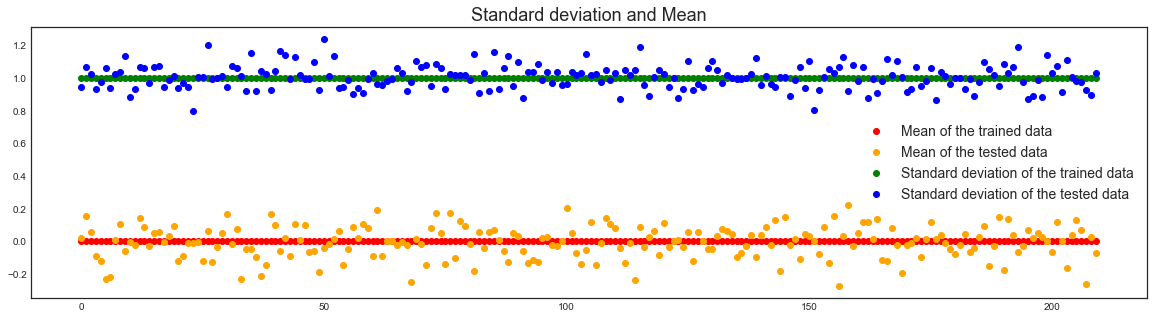

In [338]:
#We split into random train and test subsets using scikit

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Center and standarize the train and test data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot its mean and variance 




fig = plt.figure(figsize=(20, 5))
plt.scatter(range(X_train.shape[1]), X_train.mean(axis=0), color = "red",label="Mean of the trained data")
plt.scatter(range(X_test.shape[1]), X_test.mean(axis=0), color = "orange", label="Mean of the tested data")
plt.scatter(range(X_train.shape[1]), X_train.std(axis=0), color = "green", label="Standard deviation of the trained data")
plt.scatter(range(X_test.shape[1]), X_test.std(axis=0), color = "blue", label="Standard deviation of the tested data")
plt.title('Standard deviation and Mean')
plt.legend()
plt.show()


# Create two empty dataFrames

df_test = pd.DataFrame()
df_coef = pd.DataFrame()

Both the train and test data are centered and standardized.

#### Q2 Write a function to compute the determination coefficient and another to compute the mean squared error.

In [339]:
def R2(Y,Y_app):
    a = np.sum((Y-Y_app)**2)
    b = np.sum((Y - Y.mean(axis=0))**2)
    return(1-a/b)

def MSE(Y,Y_app):
    return np.sum((Y_app-Y)**2)/len(Y)

    

#### Q3 Fit a linear regression model on the train set that we will use as baseline.


In [340]:
reg = LinearRegression().fit(X_train, Y_train)

# Y_test using the model applied to X_test

Y_app = reg.predict(X_test)

print("R² of the test data:", R2(reg.predict(X_train), Y_train))
print("MSE of the test data is :", MSE(Y_test, Y_app))



df_test['Predicted_values'] = Y_app
df_coef['Estimated_coef'] = reg.coef_.flatten()



R² of the test data: 0.40354643693910897
MSE of the test data is : 3761.6963888897176


## PCA

#### Q4 Plot a heatmap of the covariance matrix.

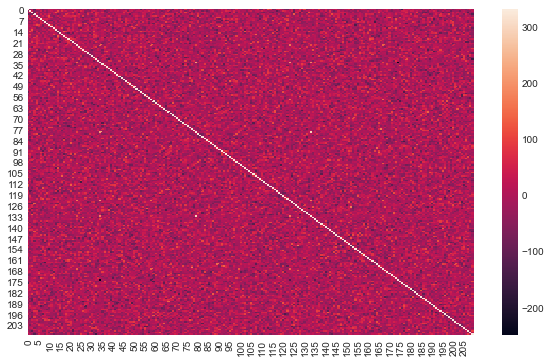

In [341]:
covMatrix = X_train.T@X_train
sns.heatmap(covMatrix)
plt.show()

#Compute the singular value decomposition of the covariance matrix

U, s, V = np.linalg.svd(covMatrix)

#### Q5 

Let $UDV$ be the singular value decomposition of $X$ with $D$ a diagonal matrix with eigenvalues $\lambda_i$.
Then the SVD of $(n-1)^{-1}X^TX$ is $(n-1)^{-1}V^TDU^TUDV = (n-1)^{-1}V^TD^2V$ with the singular values of $D^2$ being $\sigma_i$. Since the decomposition is unique, we have $\lambda_i = (n-1)^{-1}\sigma_i^2$.

#### Q6

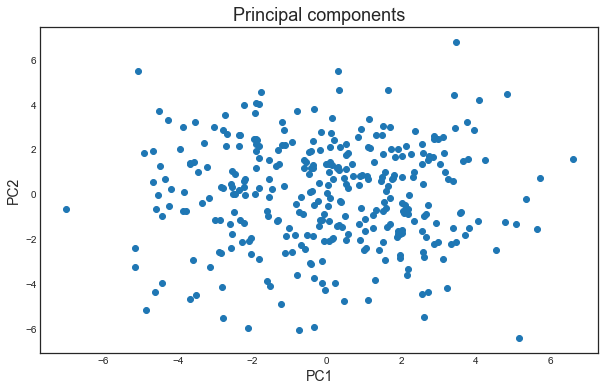

In [342]:
# Compute the PCs

PC = np.dot(X_train,U)

plt.scatter(PC[:, 0], PC[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal components")
plt.show()


### PCA before OLS

#### Q8

The PCs are computed given the above
SVD, as XU. Instead of using the whole transformation, XU, we will use (as an approximation)
the first 2 PCs, i.e., the first 2 columns in XU.

In [343]:
#Compute projected data for both the train and the test data

X_train_proj = np.dot(X_train,U)[:,:60]
X_test_proj = np.dot(X_test,U)[:,:60]

# Apply the linear regression of the sklearn library to the low dimensional data

reg = LinearRegression().fit(X_train_proj, Y_train)

# Y_test using the model applied to X_test

Y_app_proj = reg.predict(X_test_proj)

print("R² of the projected test data:", R2(reg.predict(X_train_proj), Y_train))
print("MSE of the projected test data is :", MSE(Y_test, Y_app_proj))



df_test['pca_ols'] = Y_app


R² of the projected test data: 0.3844391382179545
MSE of the projected test data is : 3400.435503277155


### Regularization - Lasso model

#### Q9

In [344]:
reg_lasso = LassoCV(alphas=np.logspace(-3, 0, 30)).fit(X_train, Y_train)
Y_app_lasso = reg_lasso.predict(X_test)

print("R² of the test data:", R2(reg_lasso.predict(X_train), Y_train))
print("MSE of the test data is :", MSE(Y_test, Y_app_lasso))
print("We use alpha :", reg_lasso.alpha_)

df_test['lasso'] = Y_app_lasso
df_coef['lasso'] = reg_lasso.coef_.flatten()

R² of the test data: 0.31177611781613335
MSE of the test data is : 3374.148183405096
We use alpha : 1.0


### Regularization - Ridge model

#### Q10

In [345]:
reg_ridge = RidgeCV(alphas=np.logspace(-1, 2, 30)).fit(X_train, Y_train)
Y_app_ridge = reg_ridge.predict(X_test)

print("R² of the test data:", R2(reg_ridge.predict(X_train), Y_train))
print("MSE of the test data is :", MSE(Y_test, Y_app_ridge))
print("We use alpha :", reg_ridge.alpha_)

df_test['Ridge'] = Y_app_ridge
df_coef['Ridge'] = reg_ridge.coef_.flatten()

R² of the test data: 0.2856290073541504
MSE of the test data is : 3364.198754984984
We use alpha : 48.93900918477494


### Variable selection

#### Q11

In [346]:
# Program the method of the forward variable selection

def fvs(X_tild,Y):
    
    # Creating the residual
    
    r = Y.copy()
    
    # Creating the variable lists
    
    
    n,p = X_tild.shape
    A = [k for k in range(p)]
    order = []
    val = []
    pv = []
    
    
    # Starting the iteration
    # Taking the largest Tˆn(Y, Xk) is equivalent to take the smallest p-value for the underlying test of noeffect
    
    
    
    for i in range(p):
        T = []
        ind = []
        residuals = []
        for k in A:
            if(k not in order):
            
                Xk_tild = X_tild[:,k].reshape(-1, 1)
                Xk = np.hstack((np.ones(Xk_tild.shape), Xk_tild))
            
                # Compute OLS
            
                reg = LinearRegression(fit_intercept=True)
                reg = reg.fit(Xk, r)
                reg_coef = reg.coef_.T
                rk = r - reg.predict(Xk)
                residuals.append(rk)
            
                # Compute Gram matrix
                Gram = (1/n) * Xk.T @ Xk

                # Compute sigma 2
                sigma = np.sqrt((1/(n-2))*np.linalg.norm(rk)**2)
            
                # Compute s
                e1 = np.array([[0, 1]]).T
                s = np.sqrt(e1.T @ np.linalg.inv(Gram) @ e1)
            
                # Compute Tk and add it to T
                Tk = np.sqrt(n)*np.abs(reg_coef)/(s*sigma)
                T.append(Tk[0][1])
                ind.append(k)
                
        if(i<3):
            a = [[ind[j],T[j]] for j in range(len(ind))]
            val.append(a)
                    
            
        #Select argmax(T)
    
        a = T.index(max(T))
        k_prime = ind[a]
        order.append(k_prime)
        r = residuals[a]
        
        if(i<50):
            p_value = 2*(1-st.norm.cdf(max(T)))
            pv.append([i,p_value])

        
    
    var = [X_tild[i] for i in order]
    print('The order of the variables is :',order)
    return val, pv
     

In [347]:
val, pv = fvs(X_train, Y_train)

The order of the variables is : [58, 123, 208, 133, 129, 13, 77, 92, 34, 152, 31, 131, 59, 196, 135, 102, 167, 56, 60, 63, 110, 130, 99, 138, 97, 53, 169, 69, 36, 79, 21, 174, 122, 51, 61, 159, 49, 74, 75, 12, 202, 95, 112, 163, 191, 204, 81, 23, 193, 147, 183, 55, 24, 108, 8, 14, 103, 19, 115, 197, 118, 71, 88, 155, 139, 83, 141, 30, 182, 168, 2, 154, 6, 149, 104, 181, 18, 199, 101, 57, 165, 93, 134, 50, 64, 65, 188, 78, 180, 136, 85, 146, 25, 87, 28, 15, 172, 171, 156, 37, 22, 201, 119, 9, 73, 38, 162, 144, 120, 32, 41, 5, 194, 125, 113, 117, 145, 43, 67, 205, 148, 84, 206, 192, 127, 161, 7, 158, 10, 106, 46, 39, 94, 203, 140, 151, 70, 128, 190, 200, 186, 185, 3, 96, 175, 164, 16, 40, 27, 105, 48, 160, 44, 54, 90, 111, 1, 45, 198, 26, 132, 114, 72, 177, 29, 91, 195, 207, 76, 20, 179, 142, 143, 209, 121, 42, 109, 52, 173, 153, 166, 62, 100, 89, 184, 176, 0, 86, 178, 82, 189, 107, 124, 126, 66, 47, 4, 116, 33, 35, 11, 187, 98, 157, 150, 170, 68, 80, 17, 137]


#### Q12

In [348]:
# Stop criterion: We choose to stop if the p-value is larger than 0.05
    
# Program the method of the forward variable selection

def fvs_pstop(X_tild,Y):
    
    # Creating the residual
    
    r = Y.copy()
    
    # Creating the variable lists
    
    var = []
    n,p = X_tild.shape
    A = [k for k in range(p)]
    order = []
    
    
    
    # Starting the iteration
    # Taking the largest Tˆn(Y, Xk) is equivalent to take the smallest p-value for the underlying test of noeffect
    
    reg = LinearRegression()
    
    for i in range(p):
        T = []
        ind = []
        residuals = []
        pv = []
        for k in A:
            if(k not in order):
            
                Xk_tild = X_tild[:,k].reshape(-1, 1)
                Xk = np.hstack((np.ones(Xk_tild.shape), Xk_tild))
            
                # Compute OLS
            
                reg = LinearRegression(fit_intercept=True)
                reg = reg.fit(Xk, r)
                reg_coef = reg.coef_.T
                rk = r - reg.predict(Xk)
                residuals.append(rk)
            
                # Compute Gram matrix
                Gram = (1/n) * Xk.T @ Xk
                
                # Compute sigma 2
                sigma = np.sqrt((1/(n-2))*np.linalg.norm(rk)**2)
            
                # Compute s
                e1 = np.array([[0, 1]]).T
                s = np.sqrt(e1.T @ np.linalg.inv(Gram) @ e1)
            
                # Compute Tk and add it to T
                Tk = np.sqrt(n)*np.abs(reg_coef)/(s*sigma)
                T.append(Tk[0][1])
                ind.append(k)
                
                # Compute p-value
                p_value = 2*(1-st.norm.cdf(abs(Tk[0][1])))
                pv.append(p_value)


                
        #Stop if no p-values are smaller than pstop:
        
        
        if(min(pv) > 0.05):
            break
            
        #Select argmax(T)
    
        a = T.index(max(T))
        k_prime = ind[a]
        order.append(k_prime)
        r = residuals[a]
        
    
    var = [X_tild[i] for i in order]
    print('The order of the variables is :',order)
    return order
    



In [349]:
sel = fvs_pstop(X_train, Y_train)

The order of the variables is : [58, 123, 208, 133, 129, 13, 77, 92]


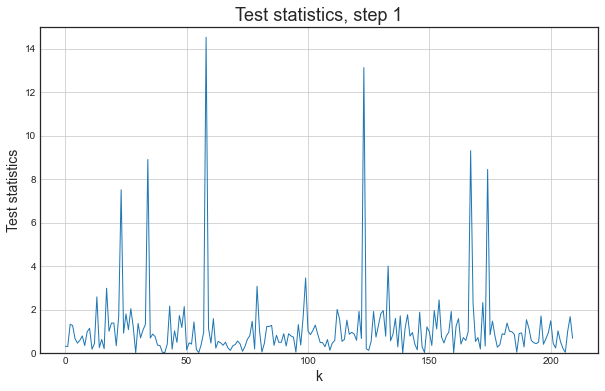

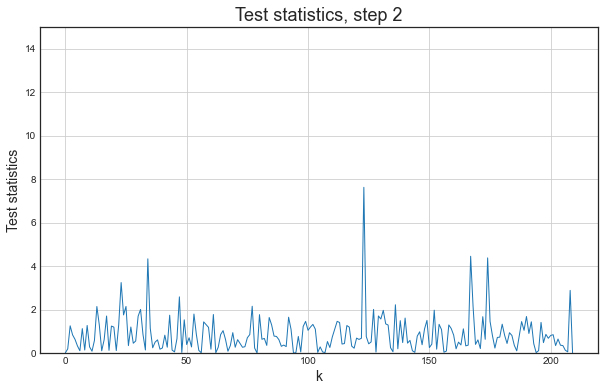

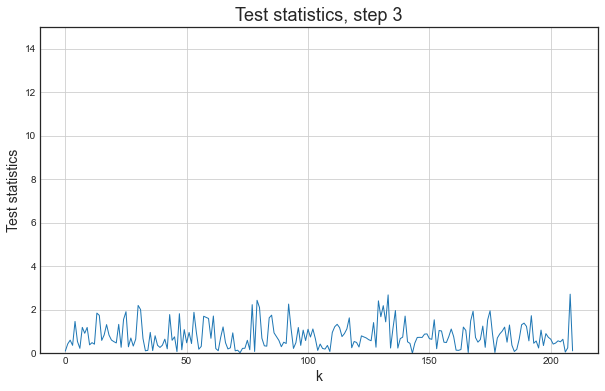

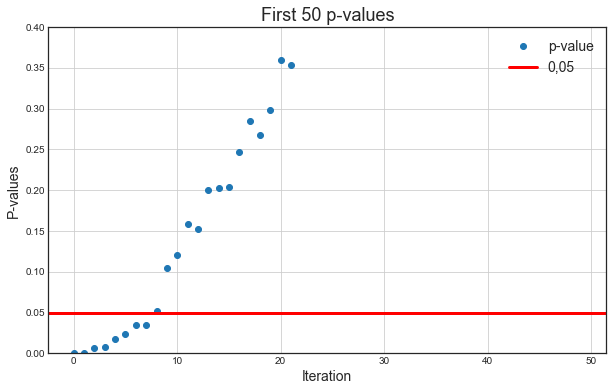

In [350]:
step1 = np.array(val[0])
step2 = np.array(val[1])
step3 = np.array(val[2])
pvarray = np.array(pv)

# Step 1
plt.plot(step1[:, 0], step1[:, 1],linewidth=1)
plt.title("Test statistics, step 1")
plt.ylim(0, 15)
plt.xlabel("k")
plt.grid()
plt.ylabel("Test statistics")
plt.show()

# Step 2
plt.plot(step2[:, 0], step2[:, 1],linewidth=1)
plt.xlabel("k")
plt.grid()
plt.ylim(0, 15)
plt.ylabel("Test statistics")
plt.title("Test statistics, step 2")
plt.show()

# Step 3
plt.plot(step3[:, 0], step3[:, 1],linewidth=1)
plt.xlabel("k")
plt.ylim(0, 15)
plt.grid()
plt.ylabel("Test statistics")
plt.title("Test statistics, step 3")
plt.show()

# P-values

plt.plot(pvarray[:, 0], pvarray[:, 1],linestyle="",marker="o", label = 'p-value')
plt.ylim(0, 0.4)
plt.axhline(y=0.05, color='r', linestyle='-', label = '0,05')
plt.grid()
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("P-values")
plt.title("First 50 p-values")

plt.show()

#### Q13

In [351]:
# Run OLS on the selected variables

X_train_selected = X_train[:, sel]
X_test_selected = X_test[:, sel]
reg = LinearRegression().fit(X_train_selected, Y_train)

# Y_test using the model applied to X_test

Y_app_selected = reg.predict(X_test_selected)

print("R² of the test data:", R2(reg.predict(X_train_selected), Y_train))
print("MSE of the test data is :", MSE(Y_test, Y_app_selected))

coef = [0 for i in range(X_train.shape[1])]
k = 0
for i in range(n):
    if(i in sel):
        coef[i] = reg.coef_[k]
        k += 1
coef_array = np.array(coef)
    
df_test["FVS"] = Y_app_selected
df_coef["FVS"] = coef_array

R² of the test data: 0.20943519138657607
MSE of the test data is : 3815.152961799495


### Comparison

#### Q14

In [352]:
df_coef_small = df_coef[['lasso','Ridge','FVS']]
df_coef_large = df_coef[['Estimated_coef']]
df_coef.head()

,Estimated_coef,lasso,Ridge,FVS
0,-1.452103e+15,-0.0,0.009518,0
1,2.532525e+15,0.0,0.551303,0
2,-1.675962e+15,-0.0,0.464341,0
3,2.127117e+15,0.0,0.241559,0
4,-2.062411e+14,-0.0,-1.022428,0


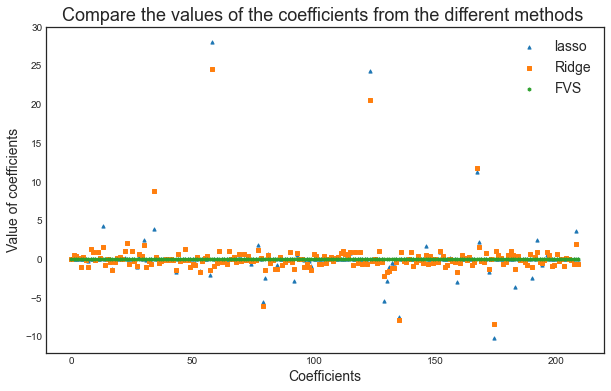

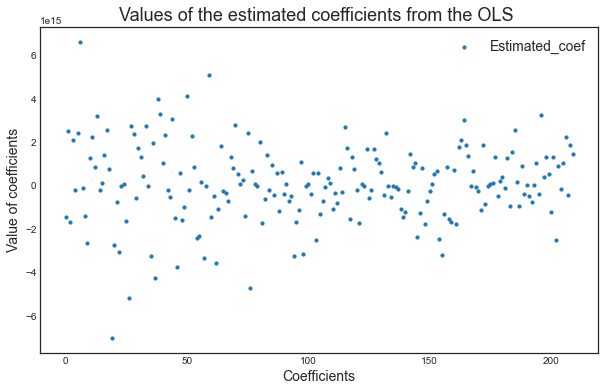

In [353]:
# The estimated coefs are much bigger than the other coefs 
# We plot them separately

plt.figure()
marker = ['^', 's', 'h']

n = 0
for i in df_coef_small:
    plt.scatter(np.arange(df_coef_small[i].size), df_coef_small[i],
                label=i, marker=marker[n], s=10)
    n += 1
    
plt.title('Compare the values of the coefficients from the different methods ')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')
plt.legend()
plt.show()

plt.figure()
for i in df_coef_large:
    plt.scatter(np.arange(df_coef_large[i].size), df_coef_large[i],
                label=i, s=10)

plt.title('Values of the estimated coefficients from the OLS ')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')
plt.legend()
plt.show()


#### Q15

In [354]:
# Number of coefficients set to 0

l = []
for i in df_coef:
    l.append(df_coef.shape[0] - np.count_nonzero(df_coef[i]))
count = pd.DataFrame([l],columns=df_coef.columns)
count

,Estimated_coef,lasso,Ridge,FVS
0,0,159,0,210


The lasso performs L1 shrinkage so that there are "corners'' in the constraint, which in two dimensions corresponds to a diamond. If the sum of squares "hits'' one of these corners, then the coefficient corresponding to the axis is shrunk to zero. Which is why the number of zeros is a lot higher than for the ridge.

(Extract from The PennState Eberly College of Science course on Applied Data Mining and Statistical Learning)

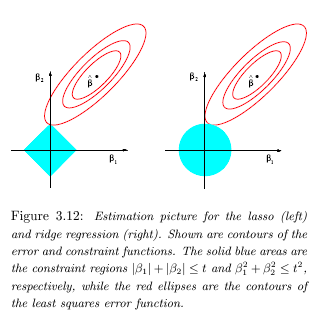

#### Q16

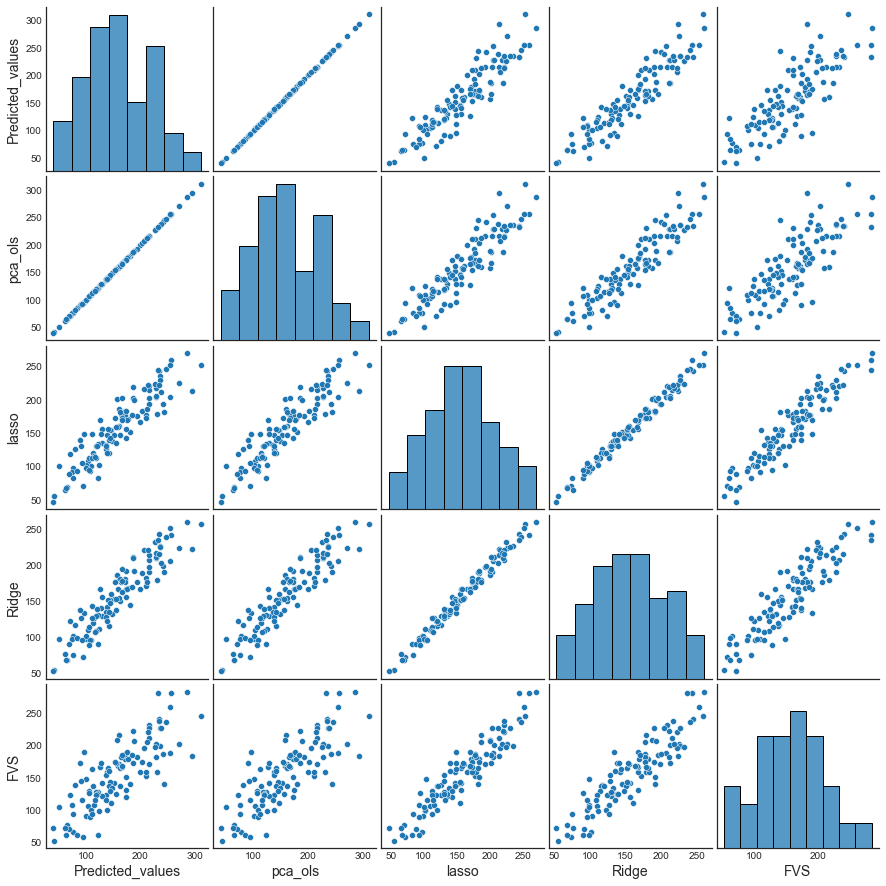

In [355]:
# Give a pairplot of the df_test dataframe

import seaborn
seaborn.pairplot(df_test)

Specify the equation to predict the value of a new, unseen data point x:

For OLS : $X^T\theta_{ols}$

For Ridge : $X^T\theta_{ridge}$

For Lasso : $X^T\theta_{lasso}$

For PCA : $X^TP_2\theta_{pca}$ with $P_2= U_1U_1^T + U_2U_2^T$